# Soal 11

1. [Buat dimensi baru bernama mpg01](#1)
2. [Prediktor apa saja yang memiliki hubungan signifikan dengan mpg01](#2)
3. [Bagi dataset menjadi training dan test dataset](#3)
4. [Gunakan LDA untuk memprediksi mpg01 menggunakan prediktor nomor 2. Berapa test error model tersebut](#4)
5. [Gunakan QDA untuk memprediksi mpg01 menggunakan prediktor nomor 2. Berapa test error model tersebut](#5)
6. [Gunakan Logistic Regression untuk memprediksi mpg01 menggunakan prediktor nomor 2. Berapa test error model tersebut](#6)
7. [Gunakan KNN untuk memprediksi mpg01 menggunakan prediktor nomor 2. Berapa test error model tersebut. Gunakan beberapa nilai K dan nilai K yang mana yang cocok](#7)

## 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
auto = pd.read_csv('../dataset/Auto.csv')

In [3]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)

In [5]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [6]:
auto = auto.drop('mpg', axis=1)

In [7]:
auto.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,8,302.0,140,3449,10.5,70,1,ford torino,0


[kembali ke atas](#Soal-11)

## 2

In [8]:
auto.corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


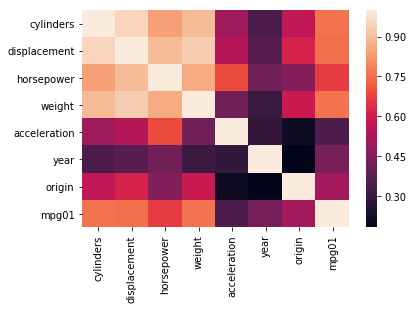

In [9]:
sns.heatmap(abs(auto.corr()))

Semakin terang warnanya maka korelasinya tinggi. `mpg01` memiliki korelasi yang cukup tinggi dengan cylinders, displacement, dan weight 

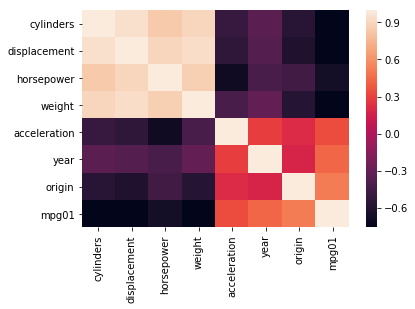

In [10]:
# korelasi tanpa nilai absolut (ingin melihat arah korelasinya)
sns.heatmap(auto.corr())

Korelasinya negatif antara cylinders, displacement, dan weight dengan mpg01

[kembali ke atas](#Soal-11)

## 3

In [11]:
columns_name = ['cylinders', 'displacement', 'weight']

In [12]:
X = auto[columns_name].values

In [13]:
X.shape

(392, 3)

In [14]:
Y = auto['mpg01'].values

In [15]:
Y.shape

(392,)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [17]:
X_train.shape

(294, 3)

In [18]:
X_test.shape

(98, 3)

[kembali ke atas](#Soal-11)

## 4

In [19]:
LDA = LinearDiscriminantAnalysis()

In [20]:
# Training
LDA.fit(X_train, Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [21]:
hasil_LDA = accuracy_score(Y_test, LDA.predict(X_test))
print('LDA -> {:.3f}%'.format(hasil_LDA*100))

LDA -> 92.857%


[kembali ke atas](#Soal-11)

## 5

In [22]:
QDA = QuadraticDiscriminantAnalysis()

In [23]:
QDA.fit(X_train, Y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [24]:
hasil_QDA = accuracy_score(Y_test, QDA.predict(X_test))
print('QDA -> {:.3f}%'.format(hasil_QDA*100))

QDA -> 93.878%


[kembali ke atas](#Soal-11)

## 6

In [25]:
LR = LogisticRegression()

In [26]:
LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
hasil_LR = accuracy_score(Y_test, LR.predict(X_test))
print('LR -> {:.3f}%'.format(hasil_LR*100))

LR -> 89.796%


[kembali ke atas](#Soal-11)

## 7

In [28]:
# mencoba nilai K untuk KNN dari K=1 sampai K=100
for K in range(1, 101):
    KNN = KNeighborsClassifier(n_neighbors=K)
    KNN.fit(X_train, Y_train)
    hasil_KNN = accuracy_score(Y_test, KNN.predict(X_test))
    print('K = {}, KNN -> {:.3f}%'.format(K, hasil_KNN*100))

K = 1, KNN -> 84.694%
K = 2, KNN -> 87.755%
K = 3, KNN -> 86.735%
K = 4, KNN -> 87.755%
K = 5, KNN -> 85.714%
K = 6, KNN -> 88.776%
K = 7, KNN -> 87.755%
K = 8, KNN -> 90.816%
K = 9, KNN -> 89.796%
K = 10, KNN -> 88.776%
K = 11, KNN -> 90.816%
K = 12, KNN -> 90.816%
K = 13, KNN -> 91.837%
K = 14, KNN -> 90.816%
K = 15, KNN -> 89.796%
K = 16, KNN -> 89.796%
K = 17, KNN -> 88.776%
K = 18, KNN -> 91.837%
K = 19, KNN -> 90.816%
K = 20, KNN -> 91.837%
K = 21, KNN -> 90.816%
K = 22, KNN -> 90.816%
K = 23, KNN -> 90.816%
K = 24, KNN -> 91.837%
K = 25, KNN -> 90.816%
K = 26, KNN -> 91.837%
K = 27, KNN -> 91.837%
K = 28, KNN -> 91.837%
K = 29, KNN -> 91.837%
K = 30, KNN -> 91.837%
K = 31, KNN -> 91.837%
K = 32, KNN -> 91.837%
K = 33, KNN -> 90.816%
K = 34, KNN -> 90.816%
K = 35, KNN -> 89.796%
K = 36, KNN -> 90.816%
K = 37, KNN -> 89.796%
K = 38, KNN -> 89.796%
K = 39, KNN -> 89.796%
K = 40, KNN -> 89.796%
K = 41, KNN -> 89.796%
K = 42, KNN -> 89.796%
K = 43, KNN -> 89.796%
K = 44, KNN -> 90.81

[kembali ke atas](#Soal-11)